# Introducción a la Ciencia de los Datos, CIDE (Profesor Gonzalo Castañeda)
## P10. Agregación de datos y operaciones en grupos
### Basado en: McKinney, Wes. 2018. “Python for Data Analysis. Data Wrangling with Pandas, NumPy, and IPython”, 2a edición, California USA: O’Reilly Media, Inc.
Cap. 10

In [1]:
# El objetivo es dividir un objeto de Pandas (e.g.,dataframe) en partes y calcular 
# estadísticas por separado
# También permite aplicar transformaciones y operaciones (e.g., regresiones) en los distintos grupos

## 1 Mecánica del GroupBy

In [2]:
# En primer término el objeto se divide en grupos a partir de una o más llaves (keys). La división
# se hace a través de un eje particular del objeto.
# Por ejemplo, un DataFrame puede agruparse en términos de sus reglones (axis= 0) 
# o de sus columnas u otros criterios (axis = 1).
# Una vez hecho esto, se aplica una función a cada grupo para generar un nuevo valor.
# Finalmente los resultados de todas estas transformciones se combinan en un nuevo objeto.

### Ilustración de una transformación por grupos 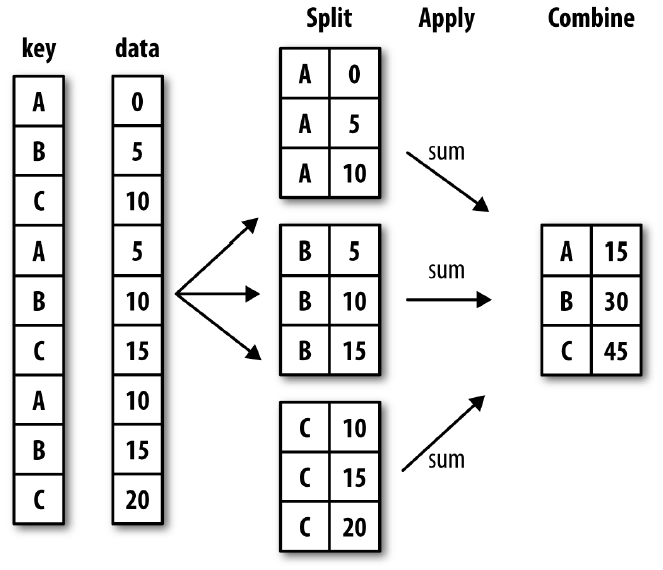

In [3]:
# Las llaves pueden ser listas de valores, nombres de columnas, llaves de diccionarios, arreglos

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Consideremos el siguiente ejemplo
In [10]: df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
....: 'key2' : ['one', 'two', 'one', 'two', 'one'],
....: 'data1' : np.random.randn(5),
....: 'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.445526,-0.946132
1,a,two,0.873325,-1.117095
2,b,one,1.115280,-0.534971
3,b,two,0.576772,-0.982800
4,a,one,-0.145058,0.579139


In [6]:
# Queremos calcular medias en la columna data1 usando como llave las etiquetas de key1
grouped = df['data1'].groupby(df['key1'])
grouped                                       # Creamos un nuevo objeto del tipo GroupBy

In [7]:
grouped.mean()          # Si queremos calcular su media


key1
a    0.724598
b    0.846026
Name: data1, dtype: float64

In [8]:
# Podemos también realizar operaciones similares con distintos criterios de agregación (key1 y key2)
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means    # En este caso hablamos de una agrupación múltiple, primero para key1 y luego para key2
         # aunque el orden no modifica los resultados

key1  key2
a     one     0.650234
      two     0.873325
b     one     1.115280
      two     0.576772
Name: data1, dtype: float64

In [9]:
means.unstack()    # Si queremos expresar e resultado en un arreglo tabular

key2,one,two
key1,,
a,0.650234,0.873325
b,1.115280,0.576772


In [10]:
# Podemos usar arreglos como llaves
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])

In [11]:
df['data1'].groupby([states, years]).mean()
# Notar que en este caso la información para agrupar no viene en el DataFrame, por lo que 
# las etiquetas se asignan según el orden en que los valores se presentan en el DataFrame 

California  2005    0.873325
            2006    1.115280
Ohio        2005    1.011149
            2006   -0.145058
Name: data1, dtype: float64

In [12]:
# Si queremos que la agrupación y la operación se aplique a todas las series de datos (columnas)
# por separado
df.groupby('key1').mean()         # a key2 no se le aplica la media ya que no tiene valores numéricos 

,data1,data2
key1,,
a,0.724598,-0.494696
b,0.846026,-0.758885


In [13]:
# Y el el caso de una agruapación múltiple sería:
df.groupby(['key1', 'key2']).mean().unstack()

data1               data2          
key2       one       two       one       two
key1                                        
a     0.650234  0.873325 -0.183496 -1.117095
b     1.115280  0.576772 -0.534971 -0.982800

In [14]:
# Para saber de que tamaño es cada grupo
df.groupby(['key1', 'key2']).size().unstack()

key2,one,two
key1,,
a,2,1
b,1,1


### Iterar sobre los grupos

In [15]:
# los objetos de GroupBy pueden usarse como iteradores
for name, group in df.groupby('key1'):
      print(name)     # el nombre son las etiquetas de key1 que operan como llaves
      print(group)

a
  key1 key2     data1     data2
0    a  one  1.445526 -0.946132
1    a  two  0.873325 -1.117095
4    a  one -0.145058  0.579139
b
  key1 key2     data1     data2
2    b  one  1.115280 -0.534971
3    b  two  0.576772 -0.982800


In [16]:
# También puede hacerse una agrupación múltiple
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  1.445526 -0.946132
4    a  one -0.145058  0.579139
('a', 'two')
  key1 key2     data1     data2
1    a  two  0.873325 -1.117095
('b', 'one')
  key1 key2    data1     data2
2    b  one  1.11528 -0.534971
('b', 'two')
  key1 key2     data1   data2
3    b  two  0.576772 -0.9828


In [17]:
# las partes de los datos los podemos incluir en un diccionario, en donde las etiquetas son las llaves
# y los valores son los arreglos tabulares
pieces = dict(list(df.groupby('key1')))
pieces['b']

,key1,key2,data1,data2
2,b,one,1.115280,-0.534971
3,b,two,0.576772,-0.982800


In [18]:
# Por default se agrupa con relación al axis=0 (renglón)
df.dtypes                    # veamos de que tipo son los datos de cada columna

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [19]:
# También se puede usar otro eje (aquí de toma el tipo de dato)
grouped = df.groupby(df.dtypes, axis=1)  

In [20]:
for dtype, group in grouped:
     print(dtype)
     print(group)

float64
      data1     data2
0  1.445526 -0.946132
1  0.873325 -1.117095
2  1.115280 -0.534971
3  0.576772 -0.982800
4 -0.145058  0.579139
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


### Selección de columnas

In [21]:
df.groupby('key1')['data2'].mean()    # es los mismo que la siguiente operación:

key1
a   -0.494696
b   -0.758885
Name: data2, dtype: float64

In [22]:
df['data2'].groupby(df['key1']).mean()

key1
a   -0.494696
b   -0.758885
Name: data2, dtype: float64

In [23]:
# Si queremos hacer agrupaciones y operaciones en una sola columna
df.groupby(['key1', 'key2'])[['data2']].mean() # Si le pongo doble paréntesis me presenta un formato  

data2
key1 key2          
a    one  -0.183496
     two  -1.117095
b    one  -0.534971
     two  -0.982800

### Otros métodos de GroupBy   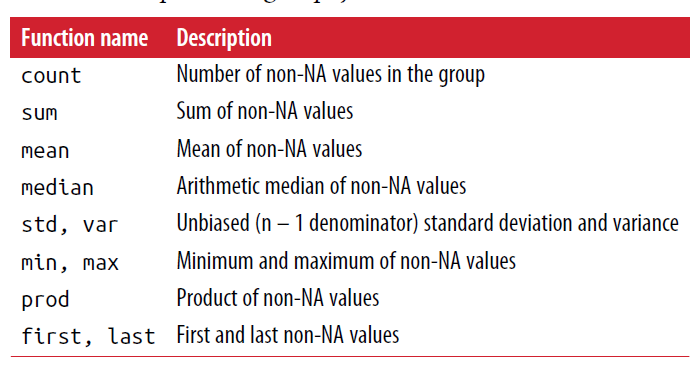

## 2. Funciones para datos agregados (Aggregate:  .agg)

In [24]:
# recordando el DataFrame
df

,key1,key2,data1,data2
0,a,one,1.445526,-0.946132
1,a,two,0.873325,-1.117095
2,b,one,1.115280,-0.534971
3,b,two,0.576772,-0.982800
4,a,one,-0.145058,0.579139


In [25]:
grouped = df.groupby('key1')['data1']    # Especificamos el mecanismo de agregación

In [26]:
# Puedo aplicarle a grouped cualquier tipo de función, por ejemplo:
def peak_to_peak(x):
    return x.max() - x.min()    # Restar los valores máximos y mínimos de una columna
grouped.agg(peak_to_peak)

key1
a    1.590583
b    0.538508
Name: data1, dtype: float64

In [27]:
grouped.describe()            # Un conjunto de estdísticas descriptivas son calculadas

,count,mean,std,min,25%,50%,75%,max
key1,,,,,,,,
a,3.0,0.724598,0.805654,-0.145058,0.364134,0.873325,1.159426,1.445526
b,2.0,0.846026,0.380782,0.576772,0.711399,0.846026,0.980653,1.115280


### Aplicación de funciones múltiple

In [28]:
tips = pd.read_csv('tips.csv')     # leemos el archivo tips

In [29]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']  # Creamos una nueva variable
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [30]:
grouped = tips.groupby(['day', 'smoker'])     # Agregamos por día de la semana y fumador
grouped_pct = grouped['tip_pct']              # Puedo elegir una variable en específico
grouped_pct.agg('mean')                       # Calculamos la media:  grouped_pct.mean() es lo mismo
#  que sería los mismo que utilizar: grouped_pct.mean()

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [31]:
# Se pueden aplicar de forma simultanea un conjunto de funciones
grouped_pct.agg(['mean', 'std', peak_to_peak])     # aquí es conveniente usar el método .agg
            # Notar que se puede usar para funciones pre-definidas o creadas por uno mismo

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [32]:
# Puedo asignarles nombres a estos métodos: 'foo' y 'bar'
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [33]:
# Puedo aplicar múltiples funciones a una clasificación también múltiple
functions = ['count', 'mean', 'max']     # Indicamos los métodos
variables = ['tip_pct', 'total_bill']    # Especificamos las variables a transformar
result = grouped[variables].agg(functions)
result


tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [34]:
# Si queremos aplicar una función diferente a cada columna usamos un diccionario
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [35]:
# Ahora aplicamos funciones múltiples a una de las columnas
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'], 'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

In [36]:
# Si no queremos que los resultados vengan con formato de indice jerárquico
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


## 3 Aplicar funciones en grupo a un conjunto de variables (.apply )

In [37]:
# Si queremos seleccionar los cinco valores más elevados de cada columna creamos una función:
def top(df, n=5, column='tip_pct'):   # especificamos como argumentos: datos, top-value, variable
 return df.sort_values(by=column)[-n:] # arregla los valores de forma ascendente y toma los n últimos

In [38]:
top(tips, n=6)       # invocamos la función, notar que no usa el defaul de n que es 5

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [39]:
# Ahora aplicamos este criterio a los distintos grupos. En este caso fumadores y no-fumadores
tips.groupby('smoker').apply(top)    # La seguna columna corresponde al índice del DataFrame tips
# Notar que no se puede usat tips.groupby('smoker').agg(top) ya que es válido para una sola variable
# del objeto de GroupBy

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [40]:
# Lo podemos hacer para varias llaves y elegir una columna en particular
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')   # elige el valor más alto

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [41]:
# Otro ejemplo
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [42]:
# Si no queremos que aparezcan los nombres de las llaves
tips.groupby('smoker', group_keys=False).apply(top)    # Comparar con dos celdas arriba

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


### Análisis por cuantiles

In [43]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
....: 'data2': np.random.randn(1000)})

In [44]:
quartiles = pd.cut(frame.data1, 4)   # Creamos cuartiles, cut se utiliza para bins de igual longitud
quartiles[:10]                       # Especificamos a que cuartiles corresponde cada dato

0     (-1.435, 0.159]
1      (0.159, 1.752]
2      (0.159, 1.752]
3     (-1.435, 0.159]
4     (-1.435, 0.159]
5     (-1.435, 0.159]
6     (-1.435, 0.159]
7      (0.159, 1.752]
8    (-3.034, -1.435]
9      (0.159, 1.752]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.034, -1.435] < (-1.435, 0.159] < (0.159, 1.752] < (1.752, 3.346]]

In [45]:
grouped = frame.data2.groupby(quartiles)     # Usamos esos cuartiles para agrupar a los datos
                                             # ya sea de data1 o de data2

In [46]:
# Generamos un conjunto de aplicaciones
def get_stats(group):      # Se crean las aplicaciones con una función
 return {'min': group.min(), 'max': group.max(),'count': group.count(), 'mean': group.mean()}  
grouped = frame.data1.groupby(quartiles)
grouped.apply(get_stats).unstack()      # Aquí se aplican a los datos agrupados

,min,max,count,mean
data1,,,,
"(-3.034, -1.435]",-3.027848,-1.435799,79.0,-1.878497
"(-1.435, 0.159]",-1.423347,0.158731,474.0,-0.515931
"(0.159, 1.752]",0.159061,1.751005,407.0,0.739775
"(1.752, 3.346]",1.779881,3.345510,40.0,2.186104


In [47]:
# Para generar bins de igual tamaño
grouping = pd.qcut(frame.data1, 10, labels=False)     # Se hacen los bins con 10 elementos
grouped = frame.data1.groupby(grouping)    # Se usan los bins para hacer las agrupaciones
grouped.apply(get_stats).unstack()         # Se aplican las funciones

,min,max,count,mean
data1,,,,
0,-3.027848,-1.299741,100.0,-1.768242
1,-1.293101,-0.814960,100.0,-1.028393
2,-0.813819,-0.492496,100.0,-0.643922
3,-0.490506,-0.278156,100.0,-0.387407
4,-0.276550,-0.009031,100.0,-0.134173
5,-0.007625,0.265096,100.0,0.130706
6,0.265997,0.502779,100.0,0.386959
7,0.503426,0.778144,100.0,0.637456
8,0.789082,1.223714,100.0,0.998319


### Ejemplo: rellanar NaN con valores agrupados

In [48]:
s = pd.Series(np.random.randn(6))      # Creamos una serie con la normal estándar de 6 valores
s[::2] = np.nan                        # Asignamos unos NaN cada 2 valores, empezando en 0
s

0         NaN
1   -1.361563
2         NaN
3    1.128909
4         NaN
5   -1.138442
dtype: float64

In [49]:
s.fillna(s.mean())          # Podemos sustituir los NAN con la media de la serie

0   -0.457032
1   -1.361563
2   -0.457032
3    1.128909
4   -0.457032
5   -1.138442
dtype: float64

In [50]:
# Si consideramos que el rellenado debe variar segun sea el grupo al que corresponde el dato
states = ['Ohio', 'New York', 'Vermont', 'Florida','Oregon', 'Nevada', 'California', 'Idaho']     
# Por ejemplo, dependiendo del área geográfica del estado:
group_key = ['East'] * 4 + ['West'] * 4  
data = pd.Series(np.random.randn(8), index=states) # Creamos la serie, en donde el índice es el estado
data

Ohio          0.871299
New York      0.910699
Vermont      -2.013616
Florida       0.760671
Oregon       -1.318319
Nevada       -0.141549
California    0.402372
Idaho        -1.059645
dtype: float64

In [51]:
# Suponemos que algunos datos van a ser faltantes
data['Vermont', 'Nevada', 'Idaho'] = np.nan
data

Ohio          0.871299
New York      0.910699
Vermont            NaN
Florida       0.760671
Oregon       -1.318319
Nevada             NaN
California    0.402372
Idaho              NaN
dtype: float64

In [52]:
data.groupby(group_key).mean()     # Sacamos la media por región

East    0.847556
West   -0.457974
dtype: float64

In [53]:
fill_mean = lambda g: g.fillna(g.mean())   # Creamos una función para aplicar media de cada grupo
data.groupby(group_key).apply(fill_mean)   # Aplicamos la función. Notar que Vermont está en el Este

Ohio          0.871299
New York      0.910699
Vermont       0.847556
Florida       0.760671
Oregon       -1.318319
Nevada       -0.457974
California    0.402372
Idaho        -0.457974
dtype: float64

In [54]:
# Se podrían utilizar valores predefinidos
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio          0.871299
New York      0.910699
Vermont       0.500000
Florida       0.760671
Oregon       -1.318319
Nevada       -1.000000
California    0.402372
Idaho        -1.000000
dtype: float64

### Ejemplo: Promedio ponderado por grupo y correlación

In [55]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
.....: 'b', 'b', 'b', 'b'],
.....: 'data': np.random.randn(8),
.....: 'weights': np.random.rand(8)})
df

,category,data,weights
0,a,-0.324645,0.110409
1,a,-0.706212,0.028769
2,a,-1.728098,0.813285
3,a,0.083608,0.706334
4,b,0.368521,0.301477
5,b,0.586610,0.809080
6,b,-1.360938,0.430114
7,b,1.669361,0.058430


In [56]:
# Promedio ponderado por categoría
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a   -0.845518
b    0.061220
dtype: float64

In [57]:
# Cargamos un nuevo archivo con precios accionarios
close_px = pd.read_csv('stockpx2.csv', parse_dates=True, index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [58]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [59]:
spx_corr = lambda x: x.corrwith(x['SPX'])
rets = close_px.pct_change().dropna()    # Calculamos calculos porcentuaes y quitamos NA
get_year = lambda x: x.year              
by_year = rets.groupby(get_year)         # Agrupamos por año
by_year.apply(spx_corr)                  # sacamos la correlacio de SPX con el crecimiento porcentual

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [60]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))   # Podemos aplicar correlaciones entre stocks

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### Ejemplo: Regresiones por grupo

In [61]:
import statsmodels.api as sm            # Bajamos librería stastmodel
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params
by_year.apply(regress, 'AAPL', ['SPX'])   # Aplicamos regresión entre dos precios agrupando por año

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


## 4. Tablas de pivote y tabulación cruzada

In [62]:
# Podemos ordenar el DataFrame por categoría (sin usar groupby) 
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [63]:
# Podemos construir una tabulación cruzada múltiple para las variables seleccionadas
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [64]:
# Podemos encontrar valores parciales para cada categoria, por ejemplo de sus medias
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [65]:
# Podemos contar el número de valores en cada categoría con: aggfunc=len
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day', aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [66]:
# Podemos cambiar los NaN con fill_value
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],columns='day', aggfunc='mean', 
                 fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

In [67]:
# Podemos crear una tabulación cruzada que calcula la recuencia de observaciones
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244